# GradientBoosting với GridSearch

In [ ]:
# @title Tải dữ liệu
from google.colab import files
uploaded = files.upload()

Saving output.csv to output.csv


In [ ]:
# @title Thêm 1 số thư viện cần thiết
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

# Tải data
output = pd.read_csv('output.csv')

In [ ]:
# @title Số hóa các thuộc tính không phải là số
le = LabelEncoder()

categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company']

for feature in categorical_features:
    output[feature] = le.fit_transform(output[feature])

output.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000.0,46998772.0,1426,146.0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000.0,58853106.0,452,104.0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000.0,538375067.0,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000.0,83453539.0,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000.0,39846344.0,1083,98.0


In [ ]:
print(np.max(output['gross']))
print(np.min(output['gross']))

2847246203.0
309.0


In [ ]:
# @title Chuẩn hóa dữ liệu
le = StandardScaler()

categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'score', 'budget', 'year', 'votes']

for feature in categorical_features:
    output[feature] = le.fit_transform(np.reshape(output[feature], (-1, 1)))

output.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,1.314895,0.776653,1.021020,-2.055166,0.020703,2.085455,4.403345,1.221233,1.307978,-0.427764,0.245517,-0.409174,46998772.0,1.206928,2.089390
1,0.818977,0.776653,-0.884429,-2.055166,-0.216407,-0.615448,-0.271523,0.860727,-0.507719,-1.336950,0.342088,-0.757987,58853106.0,-1.071648,-0.229255
2,0.631789,-1.206969,-1.265519,-2.055166,0.094382,2.397098,5.883901,-0.503214,0.208148,0.430808,0.342088,-0.433230,538375067.0,0.081677,0.874861
3,-1.602117,-1.206969,0.258840,-2.055166,-0.216407,1.358289,0.574509,-0.283920,-0.231134,1.025059,0.342088,-0.782043,83453539.0,0.462999,-1.112549
4,-1.258939,0.776653,0.258840,-2.055166,-0.158804,0.942765,-0.038322,-0.566344,-1.383028,-1.230097,0.342088,-0.721903,39846344.0,0.404514,-0.560490


In [ ]:
# @title Lựa chọn các đặc trưng và mục tiêu
features = output[['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'score', 'budget', 'year', 'votes']]
#features = df[['name', 'director', 'star', 'country', 'company', 'genre', 'runtime', 'score', 'budget', 'year', 'votes']]

target = output['gross']

In [ ]:
# @title Chia dữ liệu 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(X_train.shape[0] / (X_train.shape[0] + X_test.shape[0]))

      released    writer    rating      name     genre  director      star  \
1891  0.458755  1.255915 -1.206969  1.507932 -1.265519  1.186346 -0.328410   
75    0.698544  0.837242  0.776653  0.135871 -1.265519  0.762710  1.205022   
2138 -1.414016 -1.366758  0.776653 -1.263489  0.258840 -0.408519  0.683880   
2985 -0.528536  0.408807 -0.215158  1.466985 -1.265519 -0.023094  0.449554   
3653  0.539131  1.098642 -0.215158 -1.732109 -1.265519  1.053440 -1.305082   
...        ...       ...       ...       ...       ...       ...       ...   
3772  0.697205 -0.814673  0.776653  1.304495  1.021020  0.006810  0.970696   
5191  1.472837  0.735285 -2.198780 -0.154011  2.164289  0.661369  0.723247   
5226  1.152671 -1.007740  0.776653  0.975616 -1.265519 -0.812219 -1.130743   
5390 -0.785740 -0.748510 -0.215158 -0.421793  0.258840  1.462124  0.953824   
860   1.072295 -1.313610  0.776653  0.649338  2.164289 -0.347051  1.444972   

       country   company   runtime     score    budget      yea

In [ ]:
# @title Thêm GirdSearch
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6],
    'learning_rate': [0.5, 0.1],
    'min_samples_split': [2, 5, 10]
}

# Implementing GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(loss='squared_error', random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

grid_search.fit(features, target)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best R^2 Score:", best_score)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 10, 'n_estimators': 100}
Best R^2 Score: 0.676268609735202


In [ ]:
# @title Lựa chọn mô hình
model = GradientBoostingRegressor(loss='squared_error', random_state=42, **best_params)

In [ ]:
# @title Huấn luyện mô hình
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=6, min_samples_split=10, random_state=42)

In [ ]:
# @title Dự đoán dựa trên mô hình đã học
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [ ]:
# @title Đánh giá mô hình
# Tính R2 scores
train_accuracy = r2_score(y_train, train_predictions)
test_accuracy = r2_score(y_test, test_predictions)

print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {test_accuracy*100:.2f}%')

# Tính MAPE
train_mape = mean_absolute_percentage_error(y_train, train_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)

print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')

# Tính MAE
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

# Tính MSE
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f'Train MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')

# Tính RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')


Final Training Accuracy: 97.28%
Final Test Accuracy: 80.86%
Train MAPE: 8.09%
Test MAPE: 6.07%
Train MAE: 19999871.27
Test MAE: 44075518.20
Train MSE: 898981645909822.12
Test MSE: 8232452882874328.00
Train RMSE: 29983022.63
Test RMSE: 90732865.51


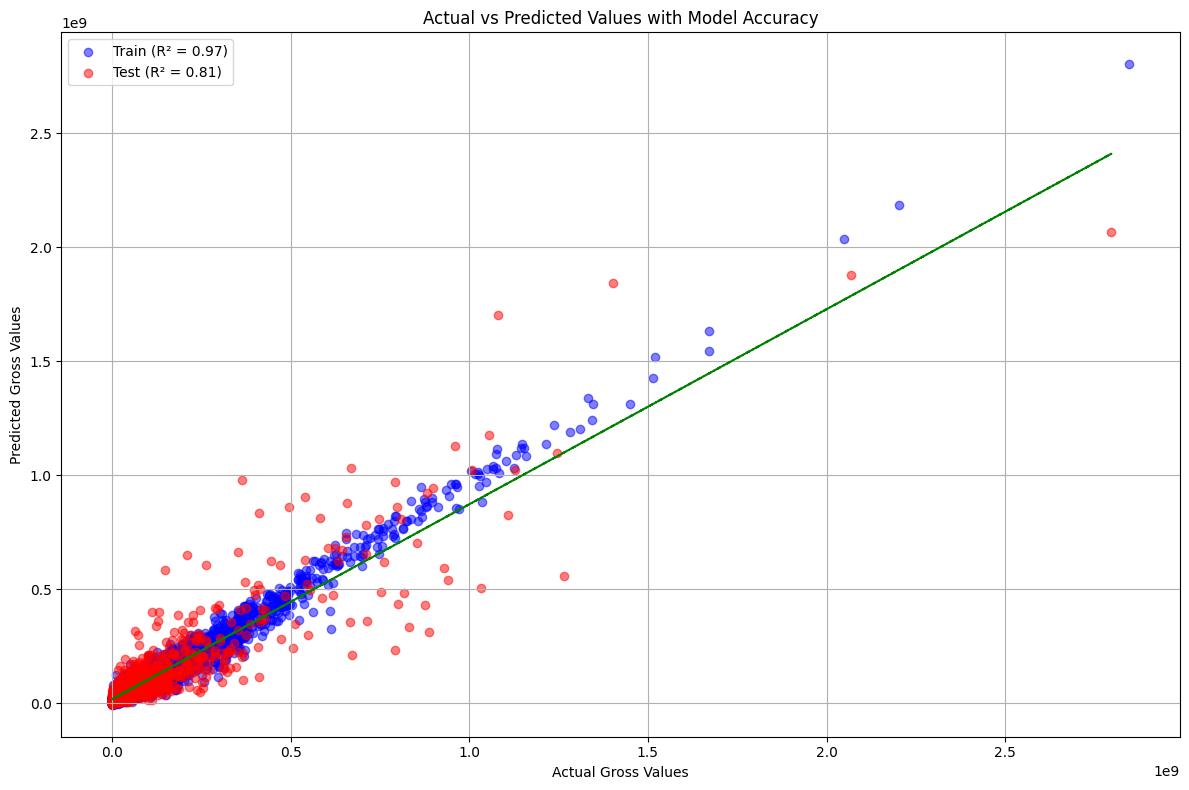

In [ ]:
# @title Vẽ biểu đồ
plt.figure(figsize=(12, 8))
plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label=f'Train (R² = {train_accuracy:.2f})')
plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label=f'Test (R² = {test_accuracy:.2f})')

z = np.polyfit(y_test, test_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='green', linestyle='--')

plt.title('Actual vs Predicted Values with Model Accuracy')
plt.xlabel('Actual Gross Values')
plt.ylabel('Predicted Gross Values')
plt.grid(True)
plt.legend()
plt.tight_layout()

# plt.savefig('model_accuracy_plot.png', dpi=300)

plt.show()

# GradientBoosting với GridSearch và PCA số chiều = 11

In [ ]:
# @title Thêm 1 số thư viện cần thiết
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Tải data
output = pd.read_csv('output.csv')

In [ ]:
# @title Số hóa các thuộc tính không phải là số
le = LabelEncoder()

categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company']

for feature in categorical_features:
    output[feature] = le.fit_transform(output[feature])

output.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000.0,46998772.0,1426,146.0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000.0,58853106.0,452,104.0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000.0,538375067.0,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000.0,83453539.0,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000.0,39846344.0,1083,98.0


In [ ]:
print(np.max(output['gross']))
print(np.min(output['gross']))

2847246203.0
309.0


In [ ]:
# @title Chuẩn hóa dữ liệu
le = StandardScaler()

categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'score', 'budget', 'year', 'votes']

for feature in categorical_features:
    output[feature] = le.fit_transform(np.reshape(output[feature], (-1, 1)))

output.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,1.314895,0.776653,1.021020,-2.055166,0.020703,2.085455,4.403345,1.221233,1.307978,-0.427764,0.245517,-0.409174,46998772.0,1.206928,2.089390
1,0.818977,0.776653,-0.884429,-2.055166,-0.216407,-0.615448,-0.271523,0.860727,-0.507719,-1.336950,0.342088,-0.757987,58853106.0,-1.071648,-0.229255
2,0.631789,-1.206969,-1.265519,-2.055166,0.094382,2.397098,5.883901,-0.503214,0.208148,0.430808,0.342088,-0.433230,538375067.0,0.081677,0.874861
3,-1.602117,-1.206969,0.258840,-2.055166,-0.216407,1.358289,0.574509,-0.283920,-0.231134,1.025059,0.342088,-0.782043,83453539.0,0.462999,-1.112549
4,-1.258939,0.776653,0.258840,-2.055166,-0.158804,0.942765,-0.038322,-0.566344,-1.383028,-1.230097,0.342088,-0.721903,39846344.0,0.404514,-0.560490


In [ ]:
# @title Lựa chọn các đặc trưng và mục tiêu
features = output[['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'score', 'budget', 'year', 'votes']]
#features = df[['name', 'director', 'star', 'country', 'company', 'genre', 'runtime', 'score', 'budget', 'year', 'votes']]

target = output['gross']

In [ ]:
# @title Chia dữ liệu 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(X_train.shape[0] / (X_train.shape[0] + X_test.shape[0]))

      released    writer    rating      name     genre  director      star  \
1891  0.458755  1.255915 -1.206969  1.507932 -1.265519  1.186346 -0.328410   
75    0.698544  0.837242  0.776653  0.135871 -1.265519  0.762710  1.205022   
2138 -1.414016 -1.366758  0.776653 -1.263489  0.258840 -0.408519  0.683880   
2985 -0.528536  0.408807 -0.215158  1.466985 -1.265519 -0.023094  0.449554   
3653  0.539131  1.098642 -0.215158 -1.732109 -1.265519  1.053440 -1.305082   
...        ...       ...       ...       ...       ...       ...       ...   
3772  0.697205 -0.814673  0.776653  1.304495  1.021020  0.006810  0.970696   
5191  1.472837  0.735285 -2.198780 -0.154011  2.164289  0.661369  0.723247   
5226  1.152671 -1.007740  0.776653  0.975616 -1.265519 -0.812219 -1.130743   
5390 -0.785740 -0.748510 -0.215158 -0.421793  0.258840  1.462124  0.953824   
860   1.072295 -1.313610  0.776653  0.649338  2.164289 -0.347051  1.444972   

       country   company   runtime     score    budget      yea

In [ ]:
# @title Thực hiện giảm số chiều thông qua PCA
pca = PCA(n_components=11) # Chỉ dữ lại 11 chiều
X_train= pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
print(X_train)

[[-1.6024251  -2.31261661 -2.20135927 ...  0.3023281  -1.03700795
  -0.25934629]
 [-0.48687207  0.39254264 -1.71853779 ... -0.14615327 -1.6307536
  -0.87069994]
 [-1.45024881  0.51088799  1.36899783 ... -0.66630636  0.42923676
   0.48472387]
 ...
 [ 0.4744293  -0.16741066  2.05564864 ...  0.32645456 -1.77824362
  -0.46370331]
 [-0.80093915 -0.32169532 -0.15081144 ... -0.68679484  0.93422315
   1.7790391 ]
 [-2.12653698  1.18736126  1.10088347 ... -0.10693287  0.13539684
   0.89021214]]


In [ ]:
# @title Thêm GridSearch
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1]
}

# Implementing GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(loss='squared_error', random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

grid_search.fit(features, target)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best R^2 Score:", best_score)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
Best R^2 Score: 0.676300407525154


In [ ]:
# @title Lựa chọn mô hình
model = GradientBoostingRegressor(loss='squared_error', random_state=42, **best_params)

In [ ]:
# @title Huấn luyện mô hình
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=500, random_state=42)

In [ ]:
# @title Dự đoán dựa trên mô hình đã học
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [ ]:
# @title Đánh giá mô hình
# Tính R2 scores
train_accuracy = r2_score(y_train, train_predictions)
test_accuracy = r2_score(y_test, test_predictions)

print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {test_accuracy*100:.2f}%')

# Tính MAPE
train_mape = mean_absolute_percentage_error(y_train, train_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)

print(f'Train MAPE: {train_mape:.2f}')
print(f'Test MAPE: {test_mape:.2f}')

# Tính MAE
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

# Tính MSE
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f'Train MAE: {train_mse:.2f}')
print(f'Test MAE: {test_mse:.2f}')

# Tính RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f'Train MAE: {train_rmse:.2f}')
print(f'Test MAE: {test_rmse:.2f}')


Final Training Accuracy: 87.33%
Final Test Accuracy: 70.48%
Train MAPE: 20.79
Test MAPE: 12.61
Train MAE: 40734617.07
Test MAE: 58904522.69
Train MAE: 4190830524324362.00
Test MAE: 12697951195427598.00
Train MAE: 64736624.29
Test MAE: 112685186.23


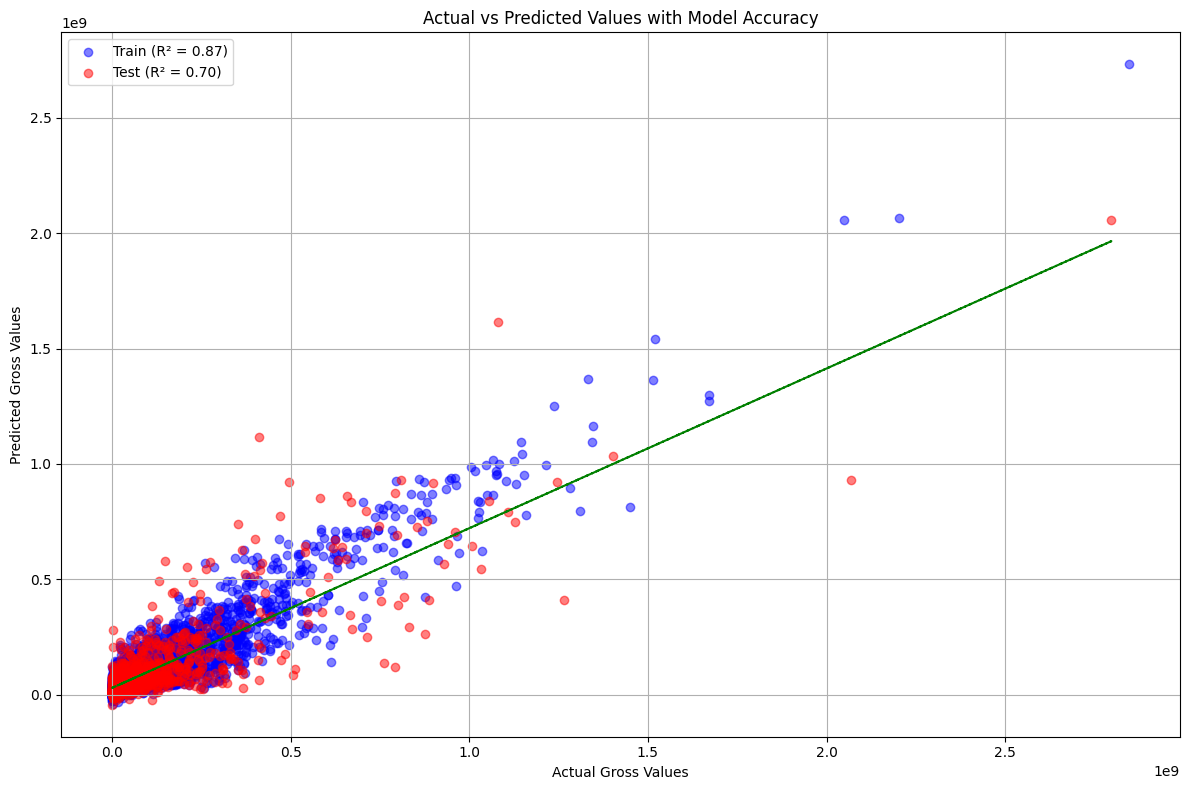

In [ ]:
# Vẽ đồ thị
plt.figure(figsize=(12, 8))
plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label=f'Train (R² = {train_accuracy:.2f})')
plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label=f'Test (R² = {test_accuracy:.2f})')

z = np.polyfit(y_test, test_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='green', linestyle='--')

plt.title('Actual vs Predicted Values with Model Accuracy')
plt.xlabel('Actual Gross Values')
plt.ylabel('Predicted Gross Values')
plt.grid(True)
plt.legend()
plt.tight_layout()

# plt.savefig('model_accuracy_plot.png', dpi=300)

plt.show()

# GradientBoosting

      released    writer    rating      name     genre  director      star  \
1891  0.458755  1.255915 -1.206969  1.507932 -1.265519  1.186346 -0.328410   
75    0.698544  0.837242  0.776653  0.135871 -1.265519  0.762710  1.205022   
2138 -1.414016 -1.366758  0.776653 -1.263489  0.258840 -0.408519  0.683880   
2985 -0.528536  0.408807 -0.215158  1.466985 -1.265519 -0.023094  0.449554   
3653  0.539131  1.098642 -0.215158 -1.732109 -1.265519  1.053440 -1.305082   
...        ...       ...       ...       ...       ...       ...       ...   
3772  0.697205 -0.814673  0.776653  1.304495  1.021020  0.006810  0.970696   
5191  1.472837  0.735285 -2.198780 -0.154011  2.164289  0.661369  0.723247   
5226  1.152671 -1.007740  0.776653  0.975616 -1.265519 -0.812219 -1.130743   
5390 -0.785740 -0.748510 -0.215158 -0.421793  0.258840  1.462124  0.953824   
860   1.072295 -1.313610  0.776653  0.649338  2.164289 -0.347051  1.444972   

       country   company   runtime     score    budget      yea

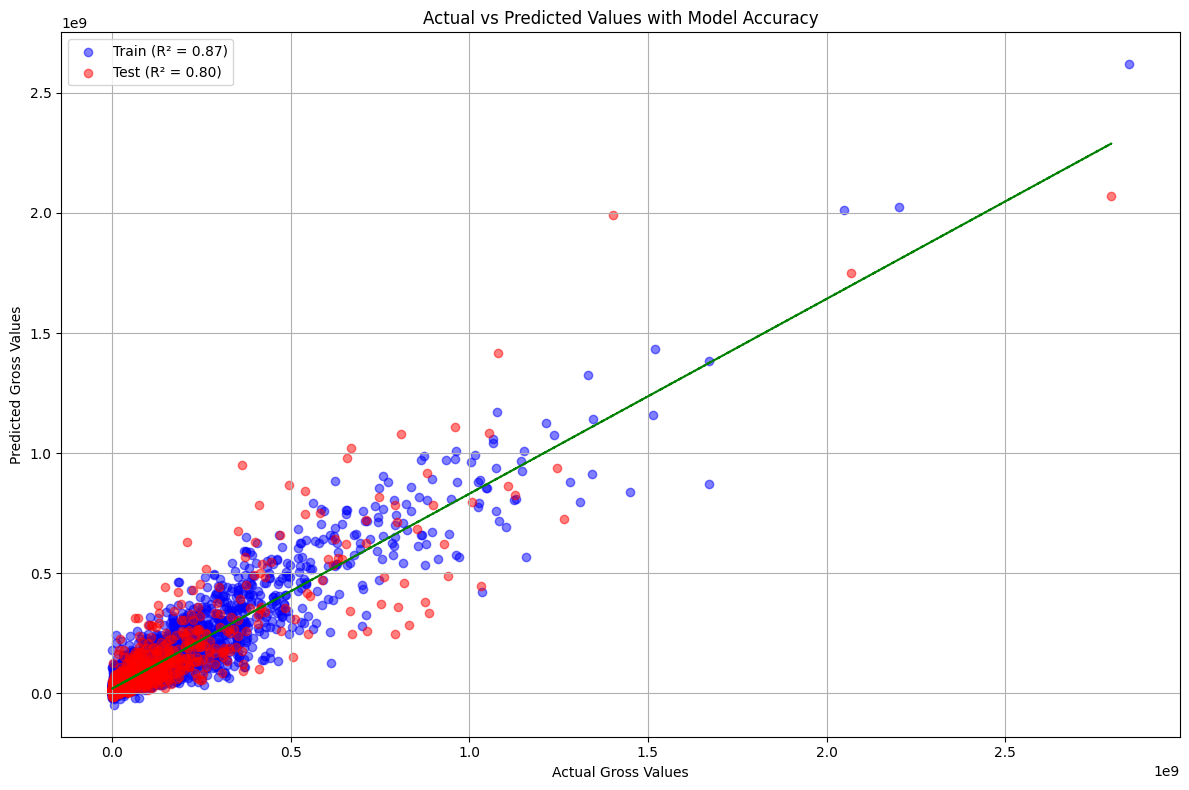

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# Thêm 1 số thư viện cần thiết
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import numpy as np

# Tải data
output = pd.read_csv('output.csv')

# Số hóa các thuộc tính không phải là số
le = LabelEncoder()

categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company']
#categorical_features = ['name', 'genre', 'director', 'star', 'country', 'company']

for feature in categorical_features:
    output[feature] = le.fit_transform(output[feature])

# Chuẩn hóa StandardScaler
le = StandardScaler()

categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'score', 'budget', 'year', 'votes']

for feature in categorical_features:
    output[feature] = le.fit_transform(np.reshape(output[feature], (-1, 1)))

# Lựa chọn các đặc trưng và mục tiêu
features = output[['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'score', 'budget', 'year', 'votes']]
#features = df[['name', 'director', 'star', 'country', 'company', 'genre', 'runtime', 'score', 'budget', 'year', 'votes']]

target = output['gross']

# Chia dữ liệu 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(X_train.shape[0] / (X_train.shape[0] + X_test.shape[0]))

# Lựa chọn mô hình
model = GradientBoostingRegressor(loss='squared_error', random_state=42)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán dựa trên mô hình đã học
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# @title Đánh giá mô hình
# Tính R2 scores
train_accuracy = r2_score(y_train, train_predictions)
test_accuracy = r2_score(y_test, test_predictions)

print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {test_accuracy*100:.2f}%')

# Tính MAPE
train_mape = mean_absolute_percentage_error(y_train, train_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)

print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')

# Tính MAE
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

# Tính MSE
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f'Train MAE: {train_mse:.2f}')
print(f'Test MAE: {test_mse:.2f}')

# Tính RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f'Train MAE: {train_rmse:.2f}')
print(f'Test MAE: {test_rmse:.2f}')

# Vẽ đồ thị
plt.figure(figsize=(12, 8))
plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label=f'Train (R² = {train_accuracy:.2f})')
plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label=f'Test (R² = {test_accuracy:.2f})')

z = np.polyfit(y_test, test_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='green', linestyle='--')

plt.title('Actual vs Predicted Values with Model Accuracy')
plt.xlabel('Actual Gross Values')
plt.ylabel('Predicted Gross Values')
plt.grid(True)
plt.legend()
plt.tight_layout()

# plt.savefig('model_accuracy_plot.png', dpi=300)

plt.show()

# GradientBoosting với PCA với số chiều = 8

      released    writer    rating      name     genre  director      star  \
1891  0.458755  1.255915 -1.206969  1.507932 -1.265519  1.186346 -0.328410   
75    0.698544  0.837242  0.776653  0.135871 -1.265519  0.762710  1.205022   
2138 -1.414016 -1.366758  0.776653 -1.263489  0.258840 -0.408519  0.683880   
2985 -0.528536  0.408807 -0.215158  1.466985 -1.265519 -0.023094  0.449554   
3653  0.539131  1.098642 -0.215158 -1.732109 -1.265519  1.053440 -1.305082   
...        ...       ...       ...       ...       ...       ...       ...   
3772  0.697205 -0.814673  0.776653  1.304495  1.021020  0.006810  0.970696   
5191  1.472837  0.735285 -2.198780 -0.154011  2.164289  0.661369  0.723247   
5226  1.152671 -1.007740  0.776653  0.975616 -1.265519 -0.812219 -1.130743   
5390 -0.785740 -0.748510 -0.215158 -0.421793  0.258840  1.462124  0.953824   
860   1.072295 -1.313610  0.776653  0.649338  2.164289 -0.347051  1.444972   

       country   company   runtime     score    budget      yea

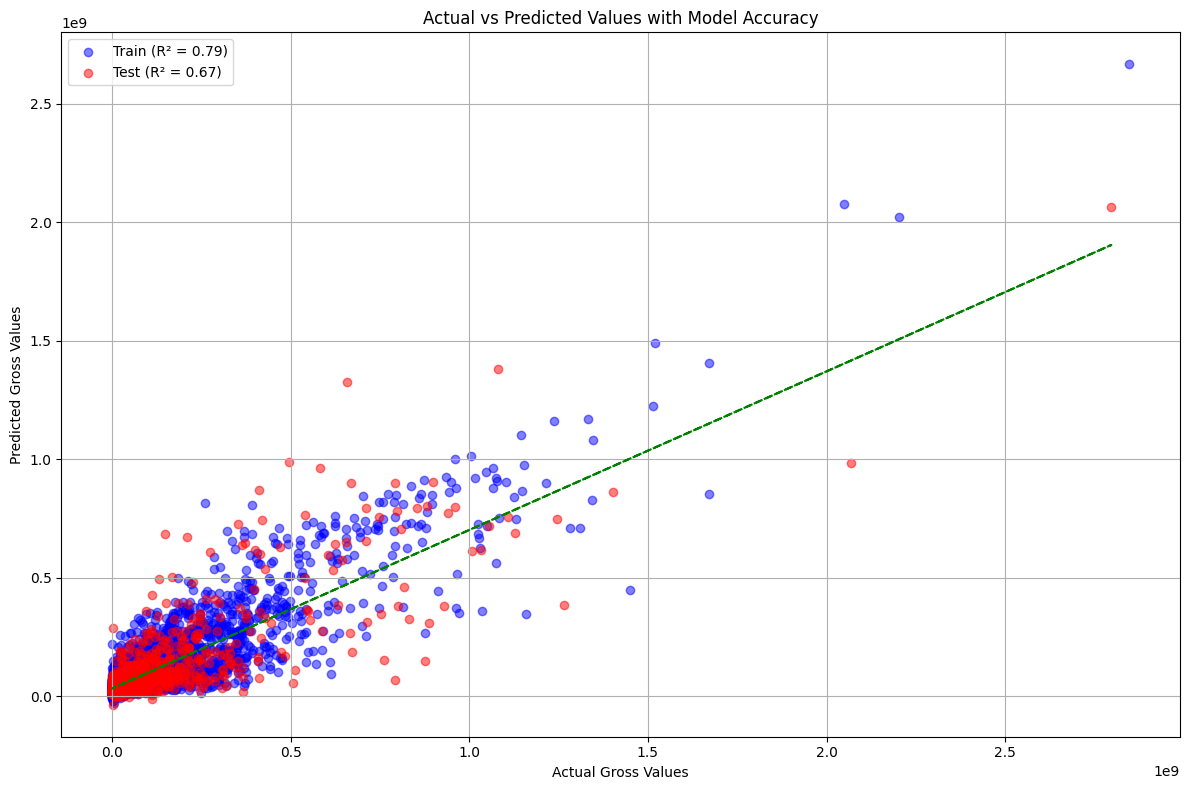

In [ ]:
# Tải dữ liệu
# from google.colab import files
# uploaded = files.upload()

# Thêm 1 số thư viện cần thiết
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import numpy as np

# Tải data
output = pd.read_csv('output.csv')

# Số hóa các thuộc tính không phải là số
le = LabelEncoder()

categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company']
#categorical_features = ['name', 'genre', 'director', 'star', 'country', 'company']

for feature in categorical_features:
    output[feature] = le.fit_transform(output[feature])

# Chuẩn hóa với Standard
le = StandardScaler()

categorical_features = ['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'score', 'budget', 'year', 'votes']

for feature in categorical_features:
    output[feature] = le.fit_transform(np.reshape(output[feature], (-1, 1)))

# Lựa chọn các đặc trưng và mục tiêu
features = output[['released','writer','rating','name', 'genre', 'director', 'star', 'country', 'company', 'runtime', 'score', 'budget', 'year', 'votes']]
#features = df[['name', 'director', 'star', 'country', 'company', 'genre', 'runtime', 'score', 'budget', 'year', 'votes']]

target = output['gross']

# Chia dữ liệu 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(X_train.shape[0] / (X_train.shape[0] + X_test.shape[0]))

# Thực hiện giảm số chiều thông qua PCA
pca = PCA(n_components=8) # Chỉ dữ lại 8 chiều
X_train= pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Lựa chọn mô hình
model = GradientBoostingRegressor(loss='squared_error', random_state=42)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán dựa trên mô hình đã học
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# @title Đánh giá mô hình
# Tính R2 scores
train_accuracy = r2_score(y_train, train_predictions)
test_accuracy = r2_score(y_test, test_predictions)

print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Final Test Accuracy: {test_accuracy*100:.2f}%')

# Tính MAPE
train_mape = mean_absolute_percentage_error(y_train, train_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)

print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')

# Tính MAE
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

# Tính MSE
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f'Train MAE: {train_mse:.2f}')
print(f'Test MAE: {test_mse:.2f}')

# Tính RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f'Train MAE: {train_rmse:.2f}')
print(f'Test MAE: {test_rmse:.2f}')

# Đánh giá mô hình
plt.figure(figsize=(12, 8))
plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label=f'Train (R² = {train_accuracy:.2f})')
plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label=f'Test (R² = {test_accuracy:.2f})')

z = np.polyfit(y_test, test_predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='green', linestyle='--')

plt.title('Actual vs Predicted Values with Model Accuracy')
plt.xlabel('Actual Gross Values')
plt.ylabel('Predicted Gross Values')
plt.grid(True)
plt.legend()
plt.tight_layout()

# plt.savefig('model_accuracy_plot.png', dpi=300)

plt.show()